In [ ]:
#pip install fairlearn
#pip install matplotlib

In [1]:
#数据导入和预处理
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
data = fetch_openml(data_id=1590, as_frame=True)
X = pd.get_dummies(data.data)
y_true = (data.target == '>50K') * 1
sex = data.data['sex']
sex.value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [2]:
#baseline模型
from fairlearn.metrics import MetricFrame,selection_rate,false_positive_rate,true_positive_rate,selection_rate,count
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
classifier.fit(X, y_true)

y_pred = classifier.predict(X)
gm = MetricFrame(metrics=accuracy_score, y_true=y_true, y_pred=y_pred, sensitive_features=sex)
print(gm.overall)
print(gm.by_group)

0.8443552680070431
sex
Female    0.925148
Male      0.804288
Name: accuracy_score, dtype: object


In [3]:
#查看更多的fairness metrics
from fairlearn.metrics import selection_rate,false_positive_rate,true_positive_rate,selection_rate,count
sr = MetricFrame(metrics=selection_rate, y_true=y_true, y_pred=y_pred, sensitive_features=sex)
print(sr.overall)
print(sr.by_group)

0.16385487899758405
sex
Female     0.06355
Male      0.213599
Name: selection_rate, dtype: object


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'precision'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'recall'}, xlabel='sex'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'true positive rate'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='sex'>],
       [<AxesSubplot:title={'center':'count'}, xlabel='sex'>,
        <AxesSubplot:xlabel='sex'>, <AxesSubplot:xlabel='sex'>]],
      dtype=object)

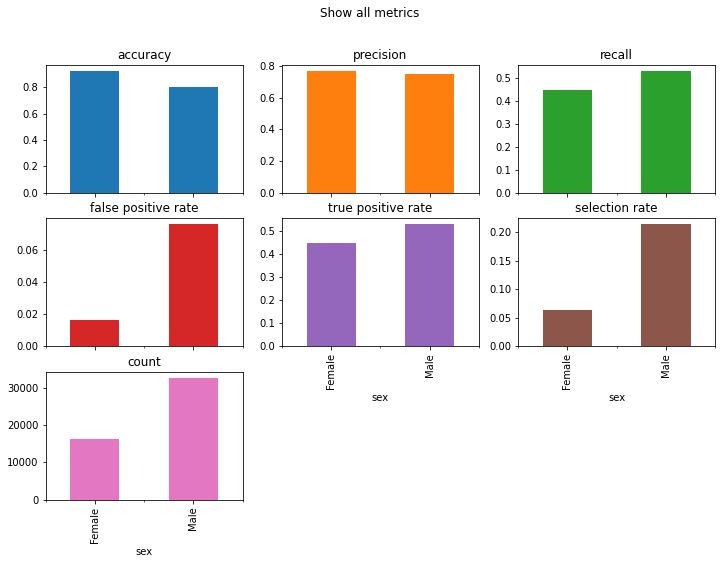

In [4]:
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    'count': count}
metric_frame = MetricFrame(metrics=metrics,
                           y_true=y_true,
                           y_pred=y_pred,
                           sensitive_features=sex)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)


In [5]:
#基于ExponentiatedGradient算法的改进
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
np.random.seed(0)  # set seed for consistent results with ExponentiatedGradient
constraint = DemographicParity()
classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
mitigator = ExponentiatedGradient(classifier, constraint)
mitigator.fit(X, y_true, sensitive_features=sex)
y_pred_mitigated = mitigator.predict(X)

/opt/homebrew/Caskroom/miniconda/base/envs/aif360/lib/python3.8/site-packages/fairlearn/reductions/_moments/utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(level=_EVENT) / \
/opt/homebrew/Caskroom/miniconda/base/envs/aif360/lib/python3.8/site-packages/fairlearn/reductions/_moments/utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(level=_EVENT) / \
/opt/homebrew/Caskroom/miniconda/base/envs/aif360/lib/python3.8/site-packages/fairlearn/reductions/_moments/utility_parity.py:251: FutureWarning: Usin

/opt/homebrew/Caskroom/miniconda/base/envs/aif360/lib/python3.8/site-packages/fairlearn/reductions/_moments/utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(level=_EVENT) / \
/opt/homebrew/Caskroom/miniconda/base/envs/aif360/lib/python3.8/site-packages/fairlearn/reductions/_moments/utility_parity.py:251: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(level=_EVENT) / \
/opt/homebrew/Caskroom/miniconda/base/envs/aif360/lib/python3.8/site-packages/fairlearn/reductions/_moments/utility_parity.py:251: FutureWarning: Usin

In [6]:
sr_mitigated = MetricFrame(metrics=selection_rate, y_true=y_true, y_pred=y_pred_mitigated, sensitive_features=sex)
print(sr_mitigated.overall)
print(sr_mitigated.by_group)

0.16614798738790384
sex
Female    0.155262
Male      0.171547
Name: selection_rate, dtype: object


In [7]:
from fairlearn.metrics import selection_rate
sr = MetricFrame(metrics=accuracy_score, y_true=y_true, y_pred=y_pred, sensitive_features=sex)
print(sr.overall)
print(sr.by_group)

0.8443552680070431
sex
Female    0.925148
Male      0.804288
Name: accuracy_score, dtype: object


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'precision'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'recall'}, xlabel='sex'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'true positive rate'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='sex'>],
       [<AxesSubplot:title={'center':'count'}, xlabel='sex'>,
        <AxesSubplot:xlabel='sex'>, <AxesSubplot:xlabel='sex'>]],
      dtype=object)

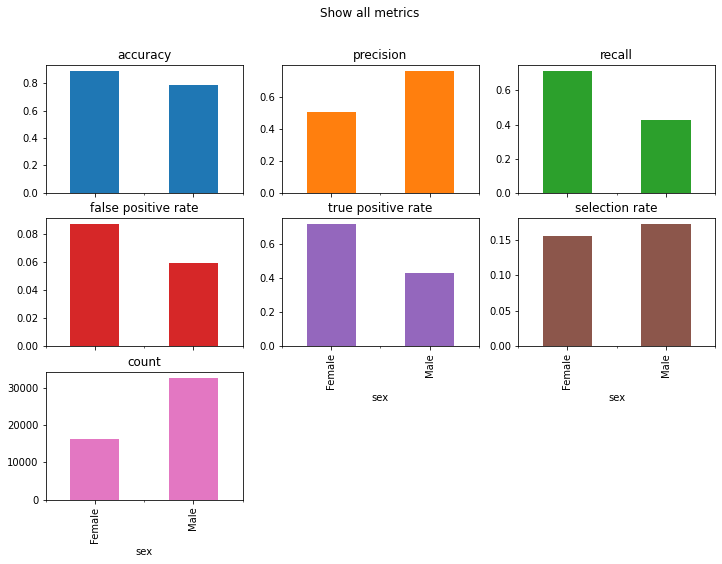

In [8]:
metric_frame = MetricFrame(metrics=metrics,
                           y_true=y_true,
                           y_pred=y_pred_mitigated,
                           sensitive_features=sex)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)